### 다중 선형 회귀
- 목표: 공부시간 & 과외횟수 --> 시험 점수 예측
- 데이터셋		: 임의
- 피쳐/속성		: 공부시간, 과외횟수
- 타겟			: 점수
- 학습방법		: 지도학습/회귀
- 학습알고리즘	: 다중 선형 	<== [조건] 데이터 분포 ~ 선형

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### [1] 데이터 준비

In [4]:
hour = [1,3,4, 5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,2,1,2,0,1]

#### [2] 생성 데이터 분포 확인

Text(0, 0.5, 'Lesson')

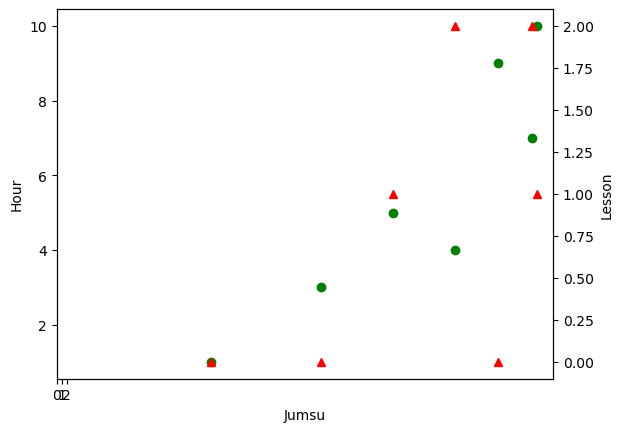

In [19]:
# plt.plot(jumsu,hour, 'go')
# plt.plot(jumsu,lesson, 'ro')
# plt.xlabel("Jumsu")
# plt.ylabel("Hour")
# plt.show()

fig, ax = plt.subplots()

ax.plot(jumsu,hour, 'go')
ax.set_xlabel("Jumsu")
ax.set_ylabel("Hour")

ax2 = ax.twinx()
ax2.plot(jumsu,lesson, 'r^')
ax2.set_xticks([0,1,2])
ax2.set_ylabel("Lesson")

##### 학습용 데이터셋 구성
- 피쳐: hour ($x_{1}$), lesson  ($x_{2}$)
- 타겟: jumsu

In [6]:
dataDF = pd.DataFrame( {'Hour':hour, 'Lesson':lesson})
jumsuSR = pd.Series(jumsu)

#### 모델 생성 & 학습

In [7]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [8]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [9]:
# 학습 진행
model.fit(dataDF, jumsuSR)				# 직선의 기울기(coef_) & 절편(intersect_) 값 반환

LinearRegression()

In [11]:
# 학습 후 모델 파라미터
print(f'기울기: {len(model.coef_)}개	{model.coef_}')			# 피쳐 2개 -> coef -> 2개!!
print(f'절편: {model.intercept_}')

기울기: 2개	[ 6.27924892 11.61819933]
절편: 30.914299470390006


#### 모델 성능 평가

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# model.score -> 내부에서 predict() 실행 ==> predict 결과로 R2 계수 산출 & 반환
score = model.score(dataDF, jumsuSR)
print(f'score : {score}')				# r2_score 와 같은 수치

score : 0.9649627963178466


In [13]:
# 성능지표 => 오차계산 & 결정계수(r2) 계산
predict_jumsu = model.predict(dataDF)

# 손실/비용 계산 ==> 정답 & 예측값 / 0에 가까울수록 Good
print(f'mse 	  : {mean_squared_error(jumsuSR, predict_jumsu)}')
print(f'rmse 	  : {mean_squared_error(jumsuSR, predict_jumsu, squared=False)}')
print(f'mae 	  : {mean_absolute_error(jumsuSR, predict_jumsu)}')

# 정답과 일치도		==> 정답 & 예측값 제공 / 1에 가까울수록 Good
print(f'r2 	  : {r2_score(jumsuSR,predict_jumsu)}')

mse 	  : 19.13460348029437
rmse 	  : 4.374311772187069
mae 	  : 4.127794208680101
r2 	  : 0.9649627963178466
